# Analize results

In [1]:
import supportFiles.myFunc as myF
import pandas as pd
import numpy as np
import math
import os
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Make graphs

In [2]:
filepath = "./dissertation/" #"./x archive x/models_2022_01_10/" #

In [3]:
temp = []

# Load files of pcapType and datasetType no more than maxNumFiles
files = [s for s in os.listdir(filepath) if ("fscore_b_SCAN" in s and "CIC.csv" in s)]
for file in files:
    temp.append(pd.read_csv(filepath+file, sep=','))
    temp[-1]["origin"] = file.split("_")[3]
data = pd.concat(temp, names=["lero"], ignore_index=True)
if "Unnamed: 0" in data.columns:
    data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Data Set,DT TN,DT FP,DT FN,DT TP,LR TN,LR FP,LR FN,LR TP,MLP TN,...,NB TP,SVM TN,SVM FP,SVM FN,SVM TP,XGB TN,XGB FP,XGB FN,XGB TP,origin
0,SCAN_NB15_CIC,21093,15582,247,154,36675,0,401,0,2553,...,93.0,36033.0,642.0,401.0,0.0,20350.0,16325.0,249.0,152.0,AB-TRAP
1,SCAN_CIC-IDS_CIC,1544295,726827,158164,640,953125,1317997,1363,157441,492583,...,157448.0,1267278.0,1003844.0,420.0,158384.0,1758135.0,512987.0,124081.0,34723.0,AB-TRAP
2,SCAN_ToN-IoT_CIC,1707077,806982,20225,15980,2514059,0,36205,0,2514059,...,0.0,2514059.0,0.0,36205.0,0.0,1568844.0,945215.0,19718.0,16487.0,AB-TRAP
3,SCAN_BoT-IoT_CIC,81538,7696,3373746,139664,50941,38293,2686426,826984,36088,...,828388.0,40325.0,48909.0,1688862.0,1824548.0,82658.0,6576.0,3090772.0,422638.0,AB-TRAP
4,SCAN_internet_CIC,9129714,2639,82298,3238,9126543,5810,85536,0,9127900,...,81371.0,9125535.0,6818.0,85536.0,0.0,9129731.0,2622.0,82506.0,3030.0,AB-TRAP
5,SCAN_AB-TRAP_CIC,6872350,2260003,40336,121687,1813889,7318464,4139,157884,2114706,...,665.0,1877755.0,7254598.0,4031.0,157992.0,4270507.0,4861846.0,150260.0,11763.0,BoT-IoT
6,SCAN_NB15_CIC,34692,1983,400,1,11755,24920,147,254,30462,...,249.0,34618.0,2057.0,148.0,253.0,35387.0,1288.0,249.0,152.0,BoT-IoT
7,SCAN_CIC-IDS_CIC,1577840,693282,59625,99179,1210381,1060741,152739,6065,1693124,...,176.0,1258326.0,1012796.0,247.0,158557.0,1765230.0,505892.0,23457.0,135347.0,BoT-IoT
8,SCAN_ToN-IoT_CIC,2238183,275876,20587,15618,371487,2142572,2974,33231,0,...,0.0,84669.0,2429390.0,156.0,36049.0,2097506.0,416553.0,15430.0,20775.0,BoT-IoT
9,SCAN_internet_CIC,6872350,2260003,51019,34517,1813889,7318464,946,84590,2114706,...,33403.0,1877755.0,7254598.0,517.0,85019.0,4270507.0,4861846.0,35111.0,50425.0,BoT-IoT


In [4]:
#setInfo = pd.DataFrame(index=myF.datasetOptions().values())
data.rename(columns={'Data Set':'target'}, inplace=True)
#data.set_index('target', inplace=True)
setInfo = pd.DataFrame(data={'name':['AB-TRAP', 'NB15', 'CIC-IDS', 'ToN-IoT', 'BoT-IoT', 'internet'],
                             'scan':[162023,401, 158804, 36205, 3513410, 85536],
                             'benign':[9132353, 36675, 2271122, 2514059, 89234, 9132353],
                             'total':[9294376,  38987, 2827677, 5350583, 13427569, 9217889]})
setInfo.set_index('name',inplace=True)
setInfo['scan_ratio'] = setInfo.apply(lambda x: 100*x['scan']/(x['scan']+x['benign']), axis=1)
setInfo
#data={'AB-TRAP':[162023, 9132353, 9294376], 'NB15':[401, 36675, 38987], 'CIC-IDS':[158804, 2271122, 2827677],'ToN-IoT':[36205, 2514059, 5350583], 'BoT-IoT':[3513410, 89234, 13427569], 'internet':[85536, 9132353, 9217889]},

,scan,benign,total,scan_ratio
name,,,,
AB-TRAP,162023,9132353,9294376,1.743237
NB15,401,36675,38987,1.081562
CIC-IDS,158804,2271122,2827677,6.535343
ToN-IoT,36205,2514059,5350583,1.419657
BoT-IoT,3513410,89234,13427569,97.523097
internet,85536,9132353,9217889,0.927935


In [5]:
sorter = setInfo.sort_values('scan_ratio').index.values
data.origin = data.origin.astype("category")
data.origin.cat.set_categories(sorter, inplace=True)
data.sort_values(["origin"], inplace=True)

### Graphs MCC per ML and target

<ipython-input-40-9f3f31fa0d6f>:31: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: ( (x[c[0]]/x[c[4]]) - x[c[5]]*x[c[6]]) / math.sqrt( x[c[5]] * x[c[6]] * ( 1 - x[c[5]] ) * ( 1 - x[c[6]]) )


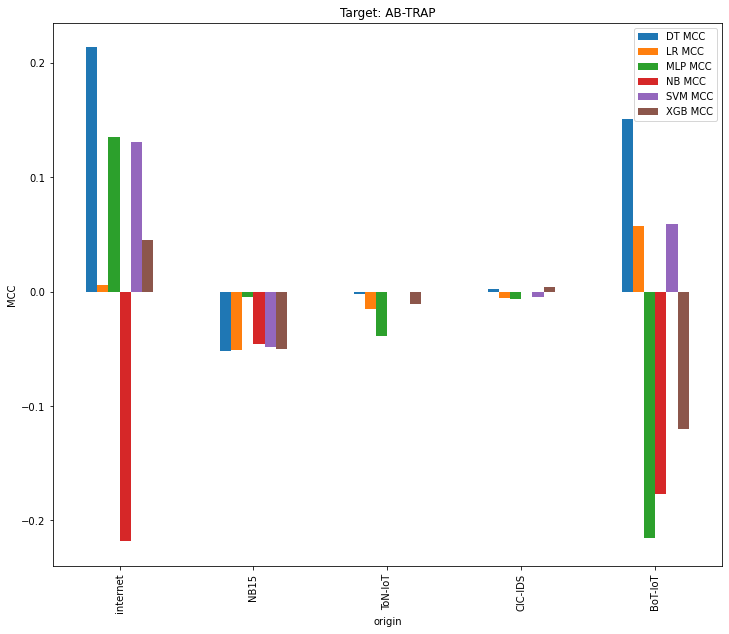

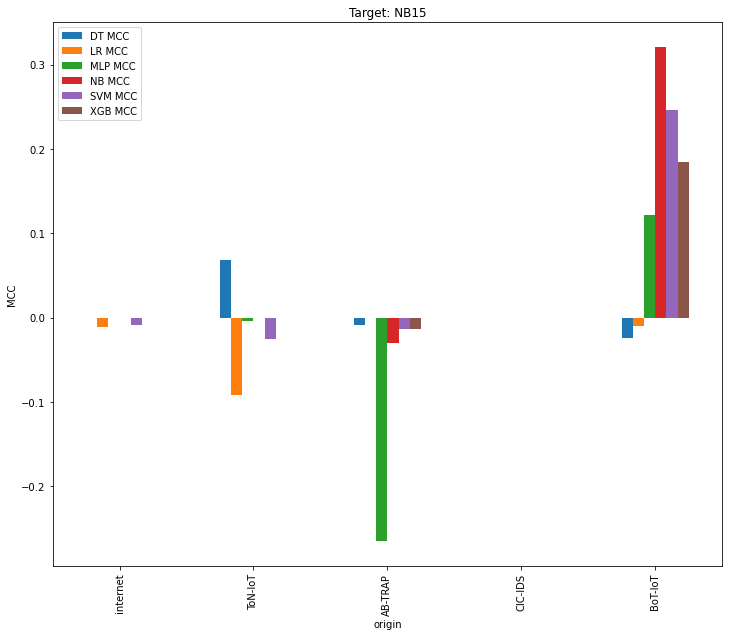

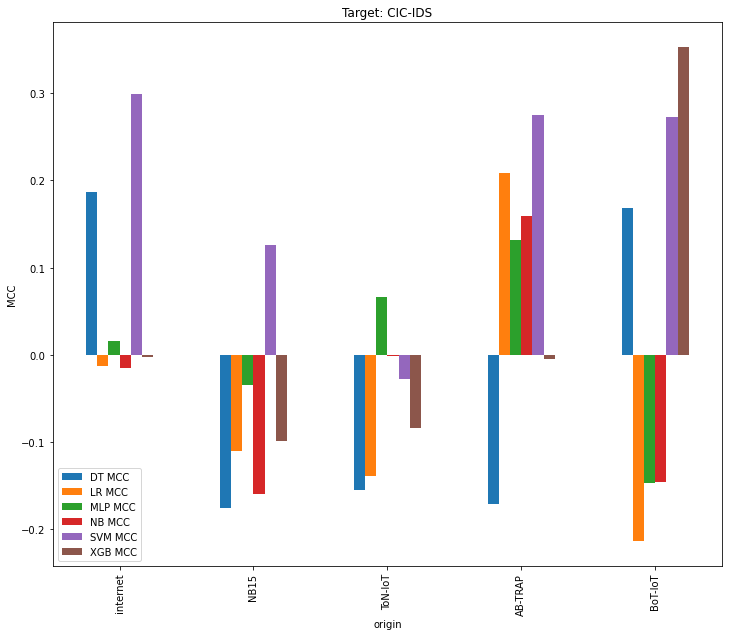

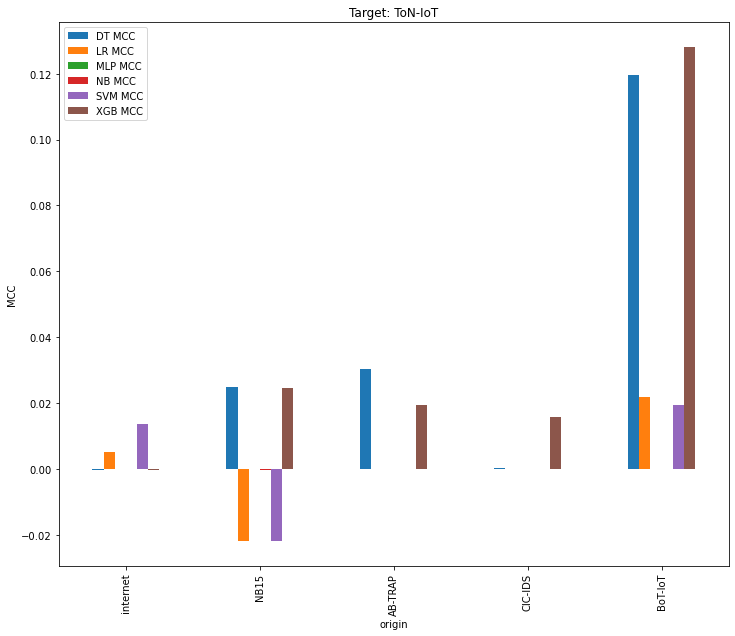

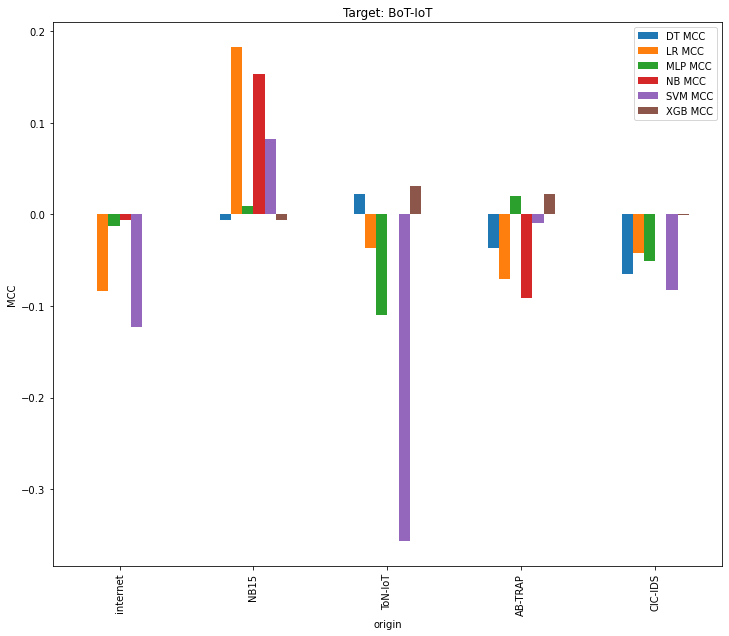

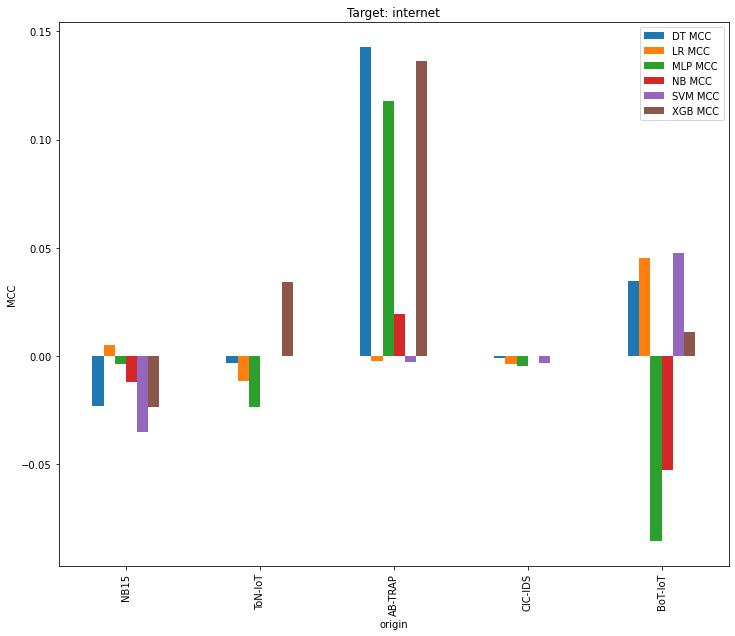

In [40]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
all_names = "{0} TP;{0} FP;{0} TN;{0} FN;{0} T;{0} S;{0} P;{0} MCC"
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
   # g1["{0} MCC".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FP".format(MLname), "{0} TN".format(MLname), "{0} FN".format(MLname)]].apply( 
   #     lambda x: (x["{0} TP".format(MLname)] * x["{0} TN".format(MLname)] - x["{0} FP".format(MLname)] * x["{0} FN".format(MLname)])
   #     / math.sqrt(x["{0} TP".format(MLname)] + x["{0} FP".format(MLname)] 
   #        * (x["{0} TP".format(MLname)] + x["{0} FN".format(MLname)])
   #        * (x["{0} TN".format(MLname)] + x["{0} FP".format(MLname)])
   #        * (x["{0} TN".format(MLname)] + x["{0} FN".format(MLname)]) ), axis=1)

    c = all_names.format(MLname).split(";")
    # 0 - TP      1 - FP     2 - TN     3 - FN     4 - T     5 - S     6 - P     7 - MCC
 
    g1[c[4]] = g1[ c[0:4] ].apply(
        lambda x: x[c[0]] + x[c[1]] + x[c[2]] + x[c[3]]
    , axis=1)
    
    g1[c[5]] = g1[[ c[0], c[3], c[4] ]].apply(
        lambda x: (x[c[0]] + x[c[3]]) / x[c[4]]
    , axis=1)
    
    g1[c[6]] = g1[[ c[0], c[1], c[4] ]].apply(
        lambda x: (x[c[0]] + x[c[1]]) / x[c[4]]
    , axis=1)
    
    g1[c[7]] = g1[[ c[0], c[4], c[5], c[6] ]].apply(
        lambda x: ( (x[c[0]]/x[c[4]]) - x[c[5]]*x[c[6]]) / math.sqrt( x[c[5]] * x[c[6]] * ( 1 - x[c[5]] ) * ( 1 - x[c[6]]) ) 
    , axis=1)
   
    
    #g1.fillna(value={c[7]:0, c[6]:0, c[5]:0}, inplace=True)
    #cols = list(range(1+x,5+x))
    #cols.extend([g1.shape[1]-1,0])
for line in setInfo.itertuples():
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "MCC" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", kind='bar', figsize=size, stacked=False, title="Target: {0}".format(line[0]))
    plt.ylabel("MCC")
    plt.savefig("./dissertation/MCC_{0}.jpg".format(line[0]), bbox_inches="tight")

### Graphs Confusion Matrix per ML and target

<ipython-input-11-21645dae5f1a>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axis = plt.subplot(2,3,1+x/4)


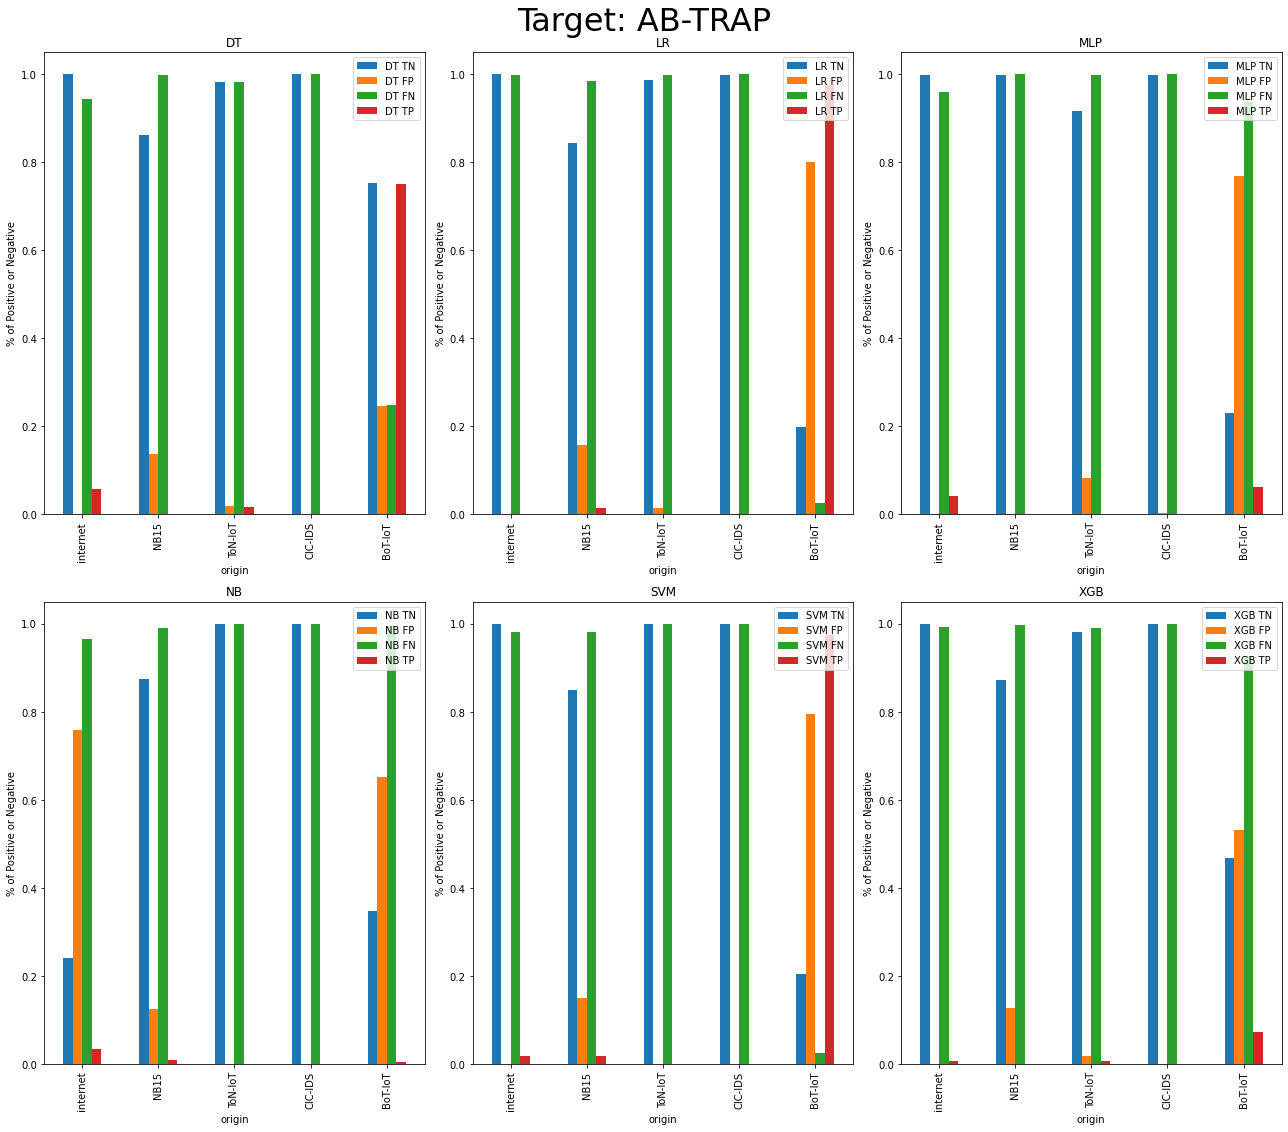

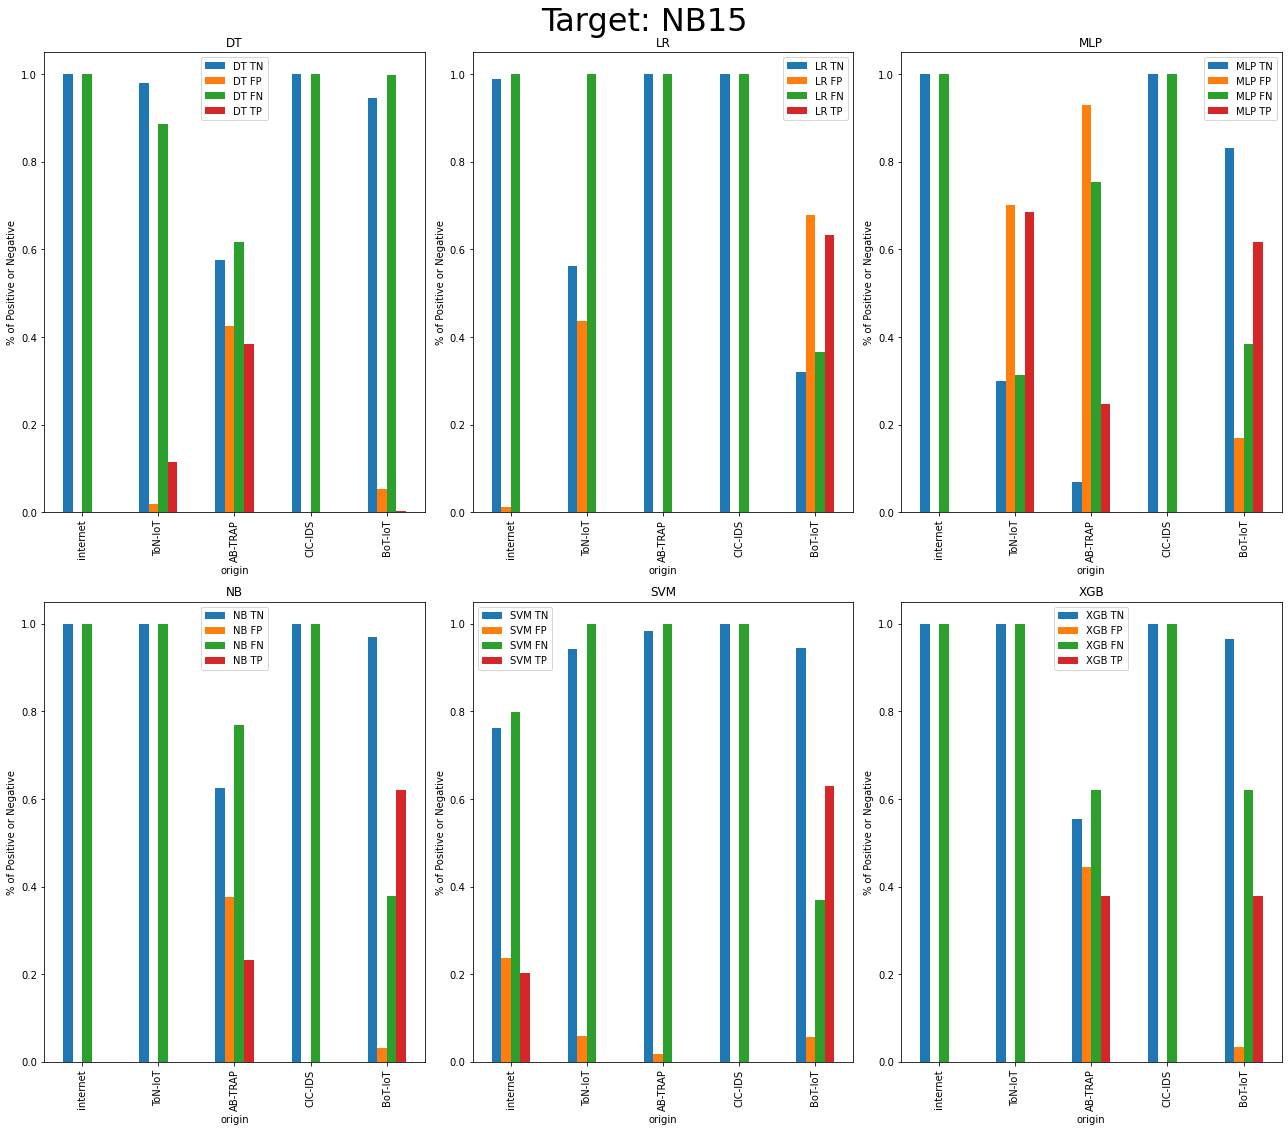

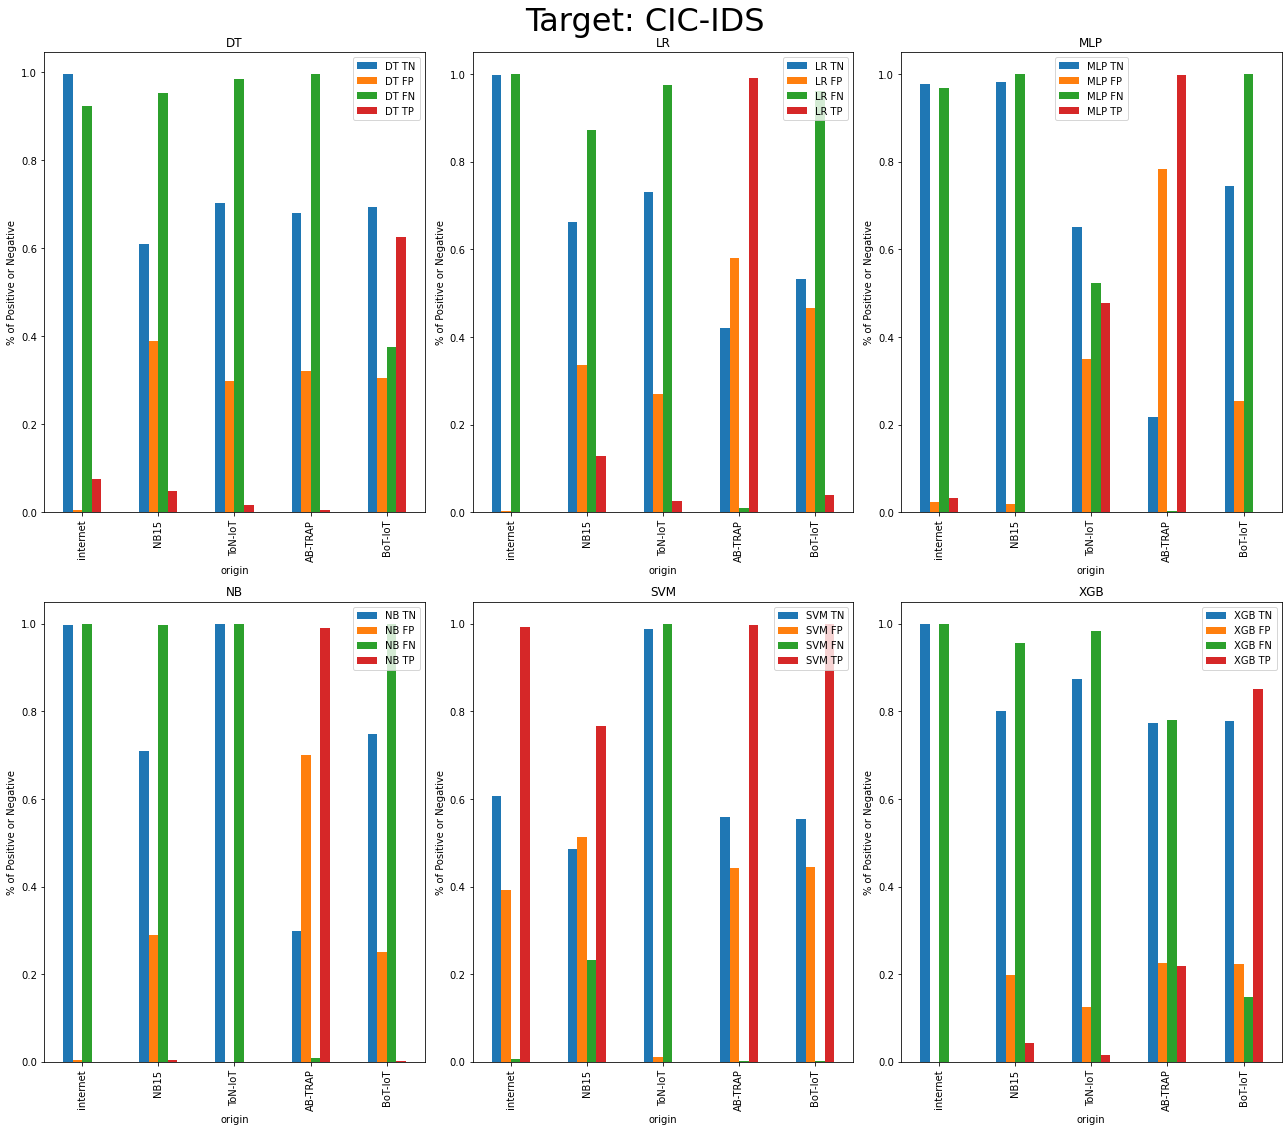

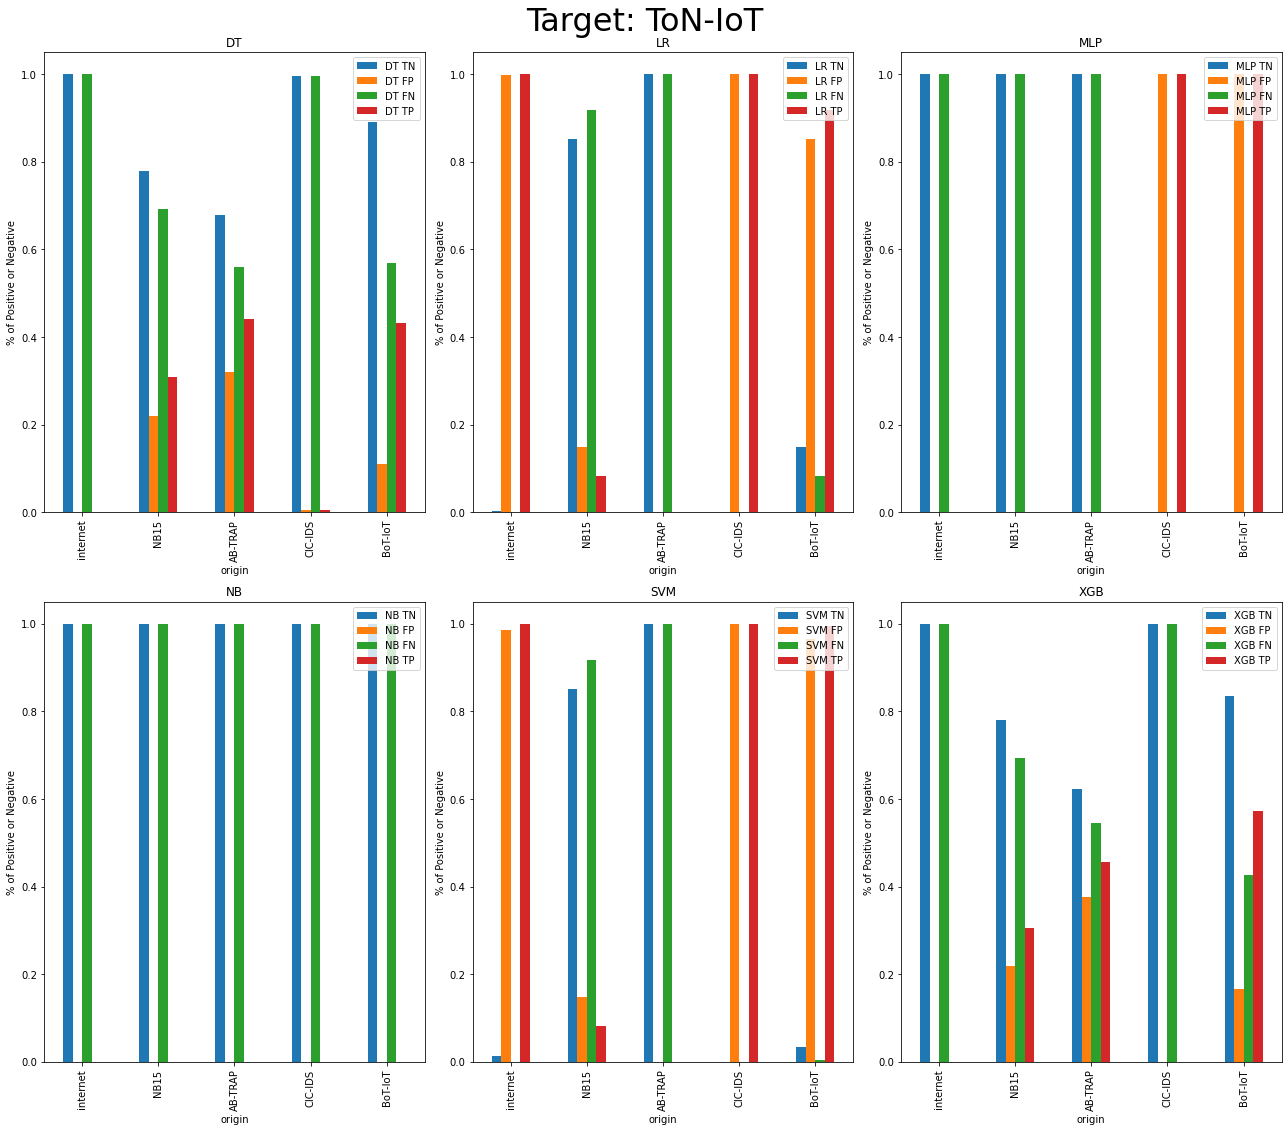

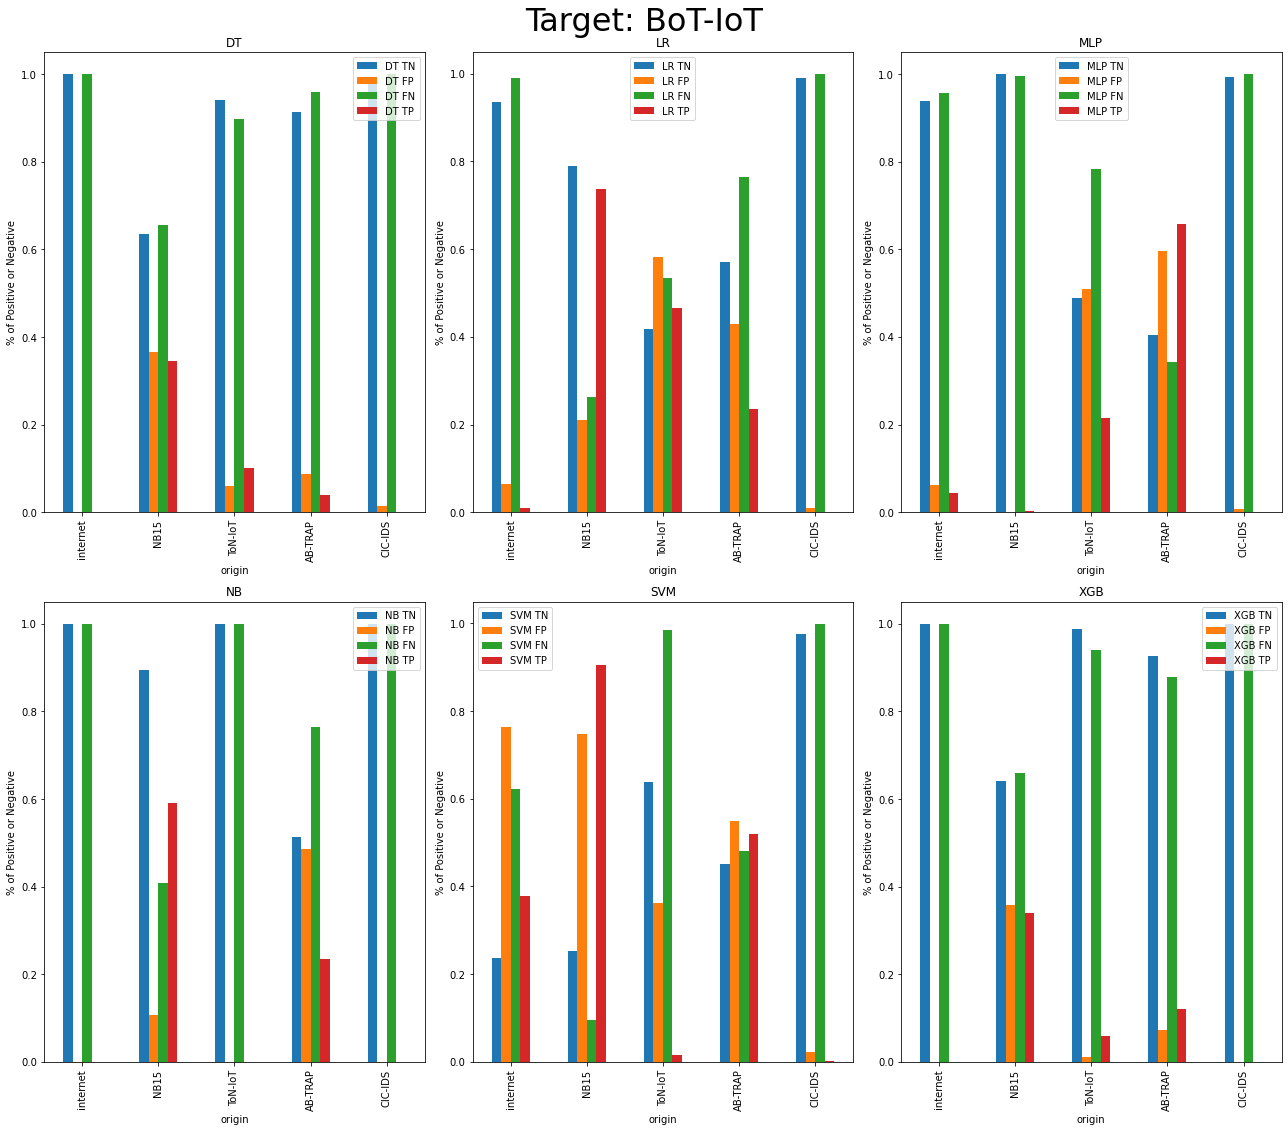

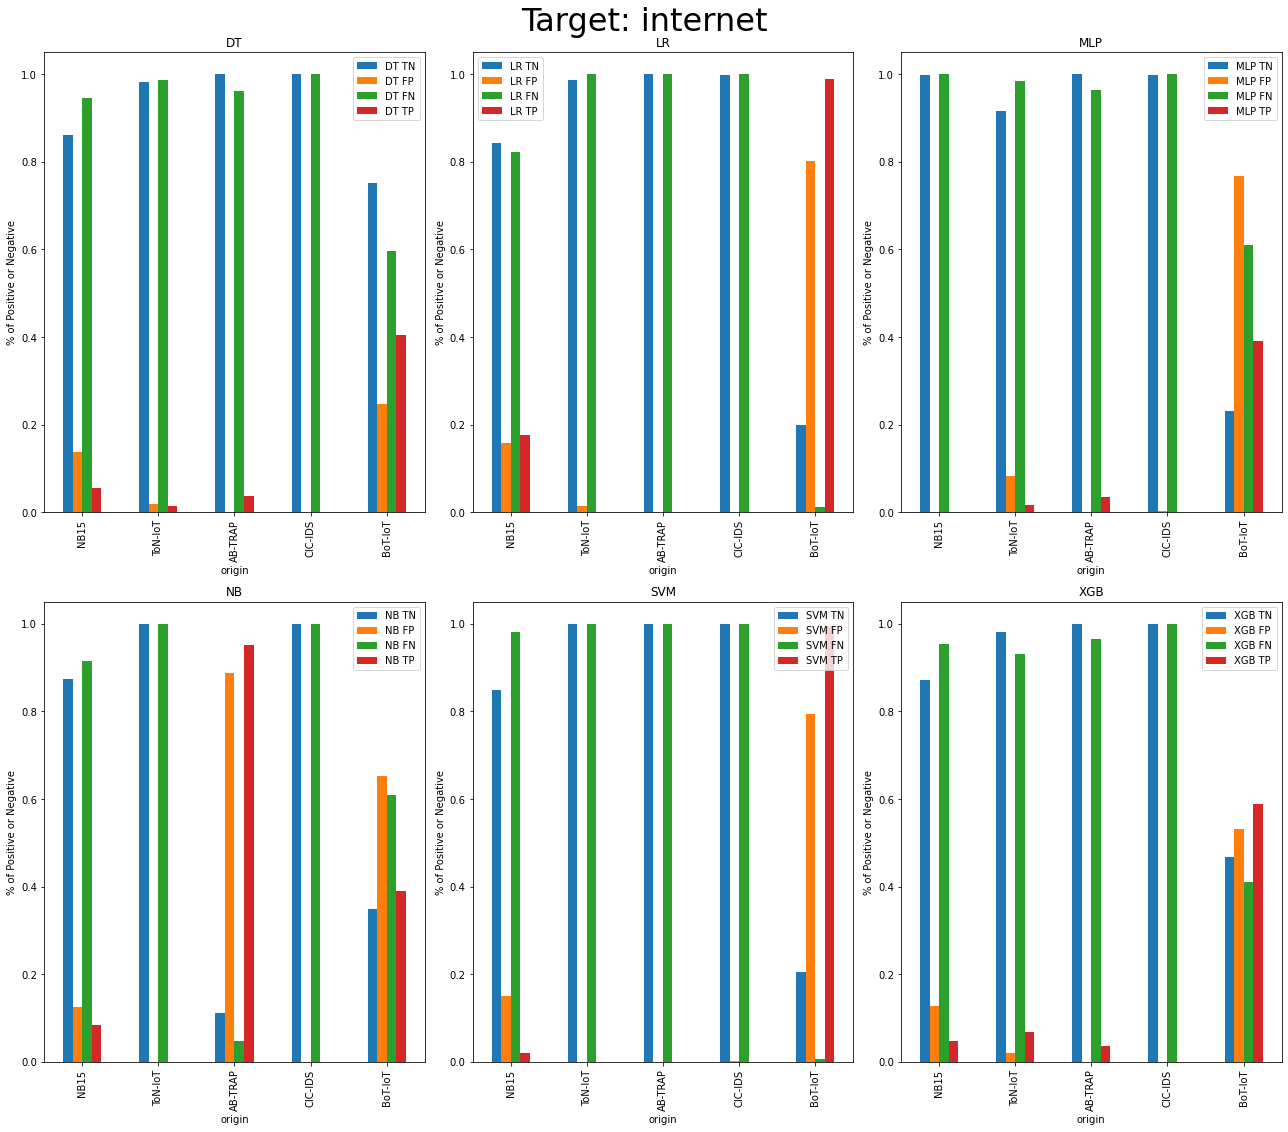

In [11]:
size = (18, 16)
for line in setInfo.itertuples():
    g1 = data[data['target'].apply(lambda x: x.split("_")[1])==line[0]].copy()
    
    g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
    g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
    fig = plt.figure(figsize=(12,10))

    for x in range(0,g1.shape[1]-5,4):
        MLname = g1.columns[1+x].split(" ")[0]
        cols = list(range(1+x,5+x))
        cols.extend([g1.shape[1]-1,0])
        g2 = g1.iloc[:,cols]
        axis = plt.subplot(2,3,1+x/4)
        axis.set(ylabel='% of Positive or Negative')
        g2.plot(x="origin", ax=axis, figsize=size, kind="bar", stacked=False, title=MLname) # Machine {1} tested on {0}".format(line[0],MLname)
    
    fig.suptitle("Target: {0}".format(line[0]), fontsize=32)
    fig.tight_layout()
    plt.savefig("./dissertation/target_{0}_confusion.jpg".format(line[0]), bbox_inches="tight")
    #fig.subplots_adjust(top=0.9)
    

### Graphs ML f-score per target

<ipython-input-6-d9147cbf32a6>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
<ipython-input-6-d9147cbf32a6>:12: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: 2 * x["{0} Precision".format(MLname)] * x["{0} Recall".format(MLname)] / (x["{0} Precision".format(MLname)] + x["{0} Recall".format(MLname)]), axis=1)
<ipython-input-6-d9147cbf32a6>:8: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)


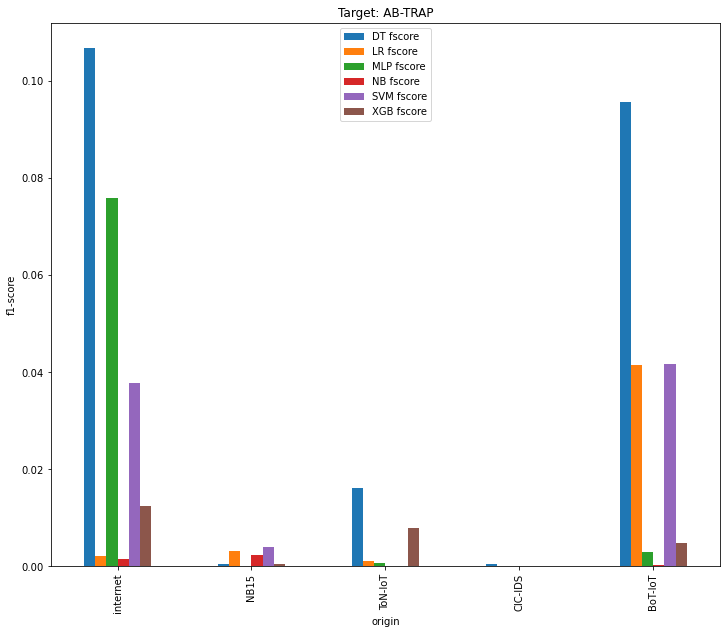

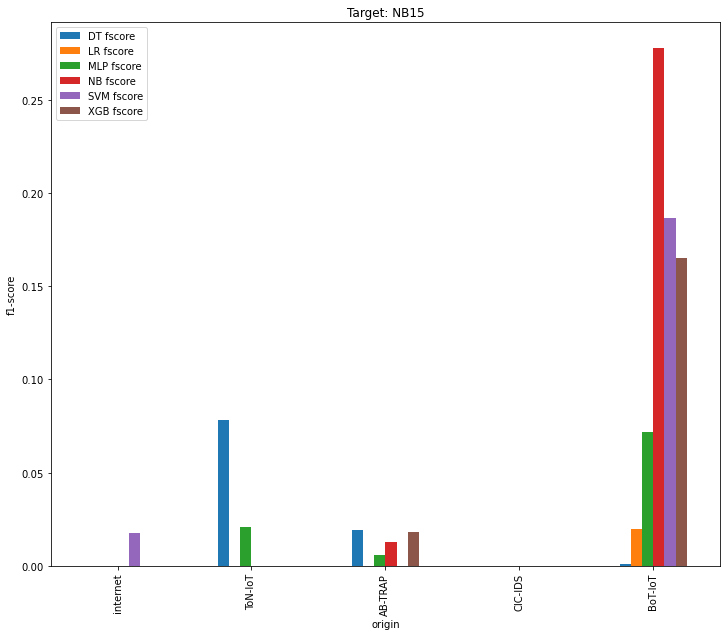

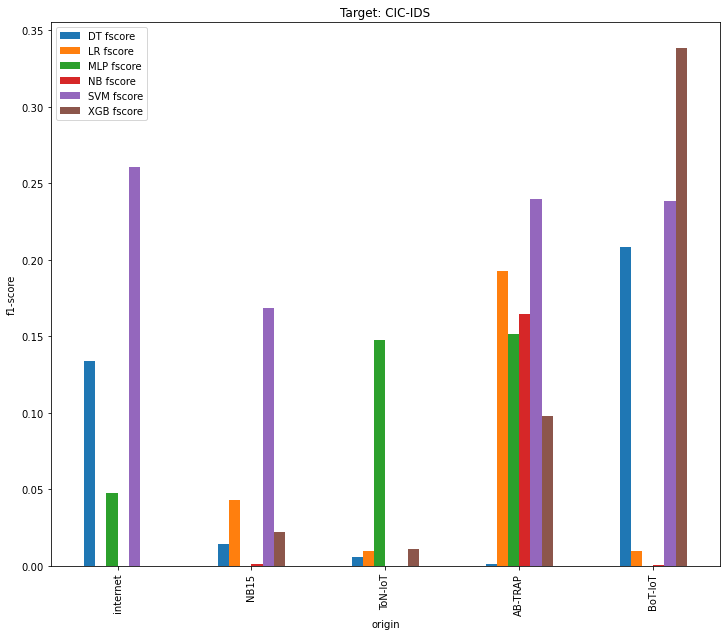

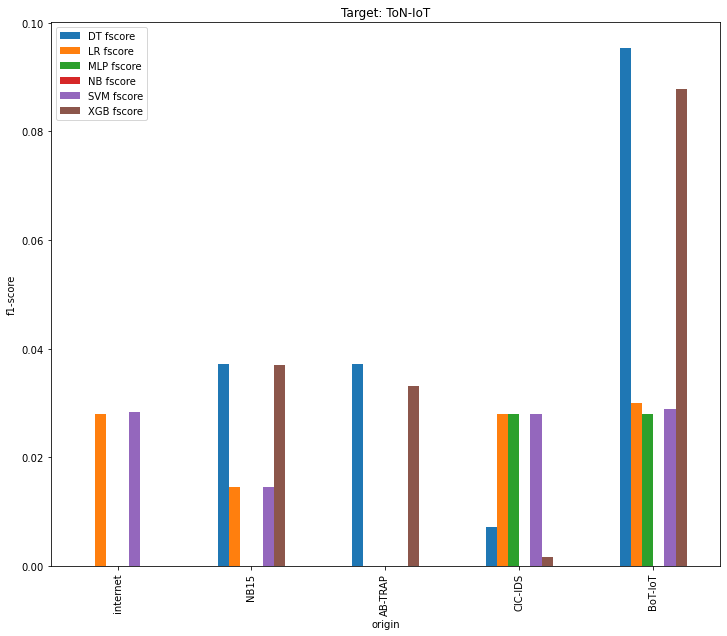

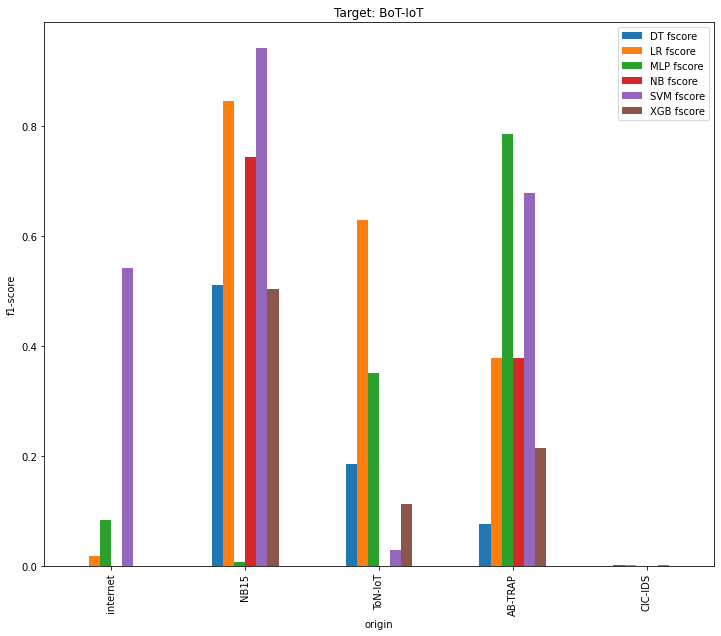

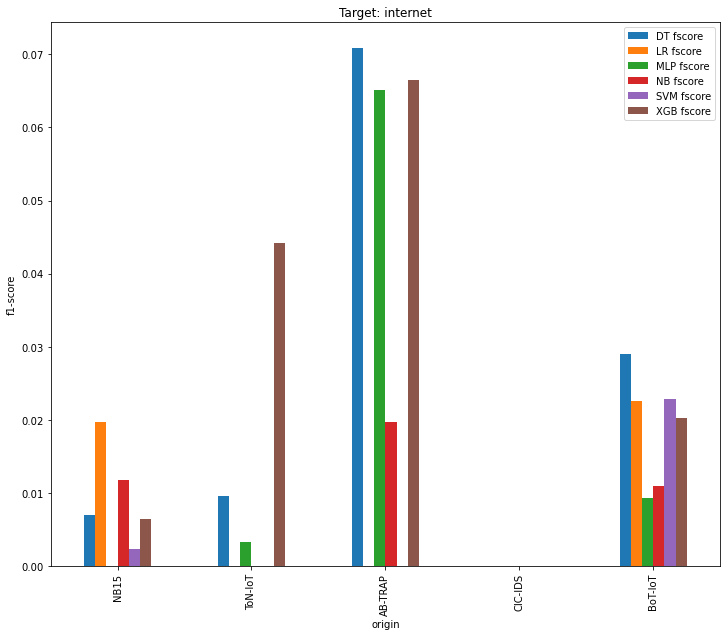

In [6]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
    g1["{0} Precision".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FP".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
    g1["{0} Recall".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FN".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FN".format(MLname)]), axis=1)
    g1["{0} fscore".format(MLname)] = g1[["{0} Precision".format(MLname), "{0} Recall".format(MLname)]].apply( 
        lambda x: 2 * x["{0} Precision".format(MLname)] * x["{0} Recall".format(MLname)] / (x["{0} Precision".format(MLname)] + x["{0} Recall".format(MLname)]), axis=1)
    g1.fillna(value={"{0} fscore".format(MLname):0, "{0} Precision".format(MLname):0, "{0} Recall".format(MLname):0}, inplace=True)
    #cols = list(range(1+x,5+x))
    #cols.extend([g1.shape[1]-1,0])
for line in setInfo.itertuples():
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "fscore" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", kind='bar', figsize=size, stacked=False, title="Target: {0}".format(line[0]))
    plt.ylabel("f1-score")
    plt.savefig("./dissertation/fscore_{0}.jpg".format(line[0]), bbox_inches="tight")

### Graphs ML per target

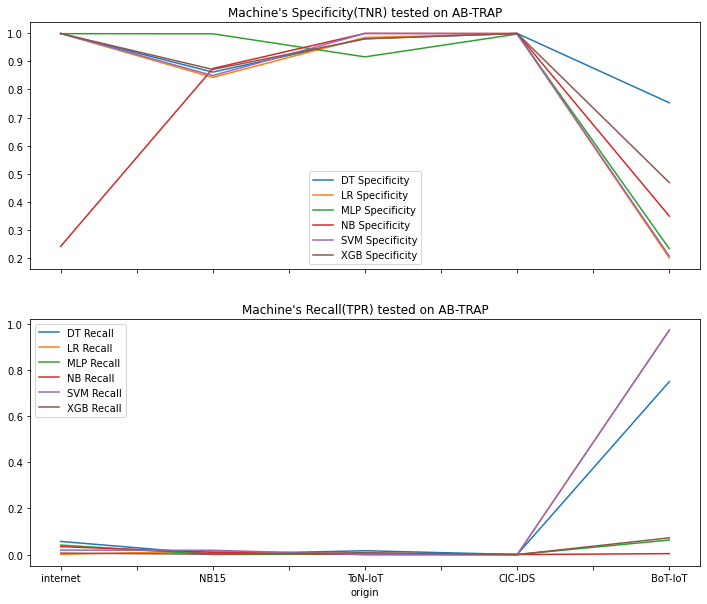

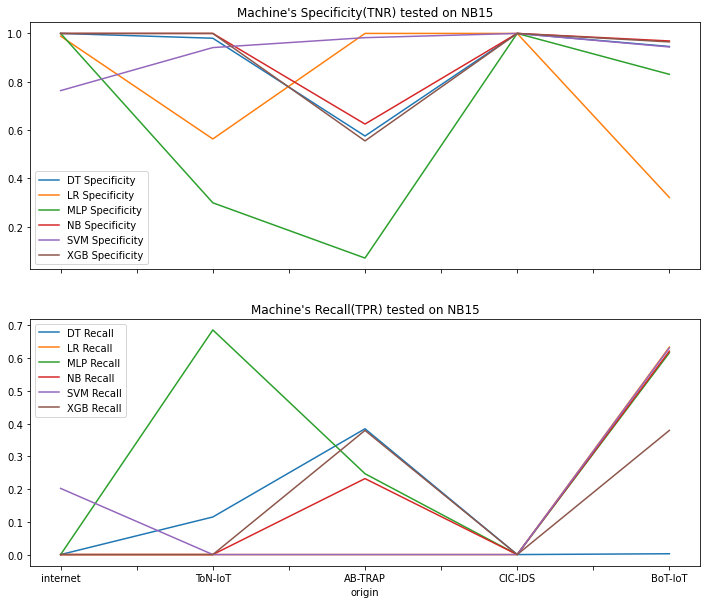

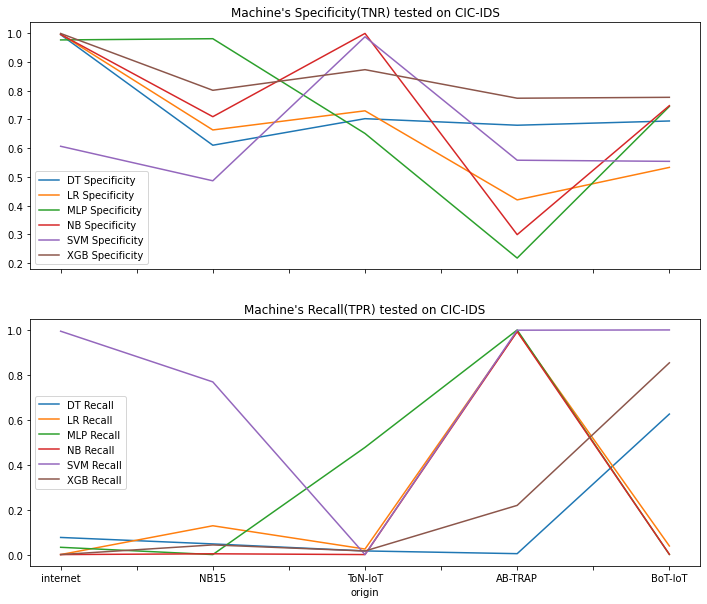

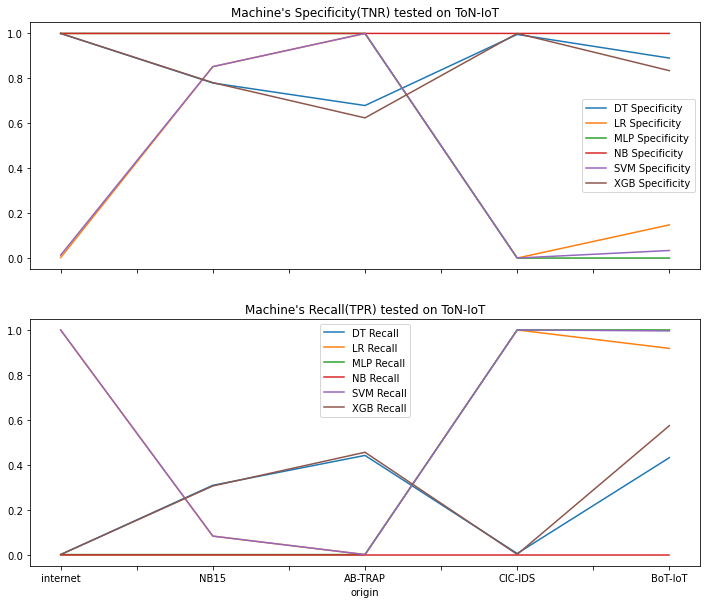

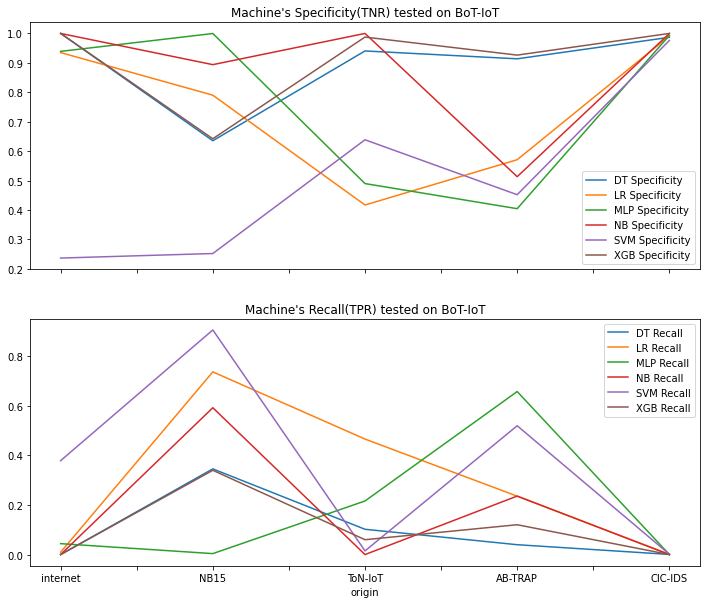

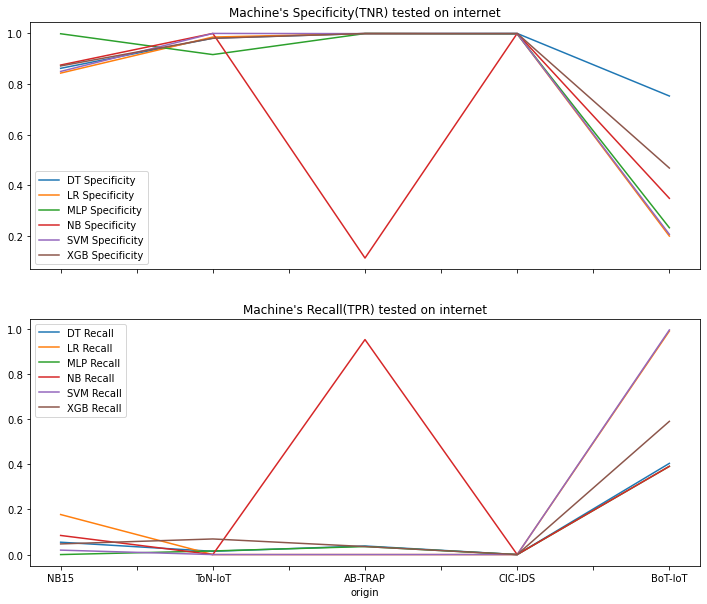

In [6]:
g1 = data.copy()#[data['target'].apply(lambda x: x.split("_")[1])==line[0]]
#g1[[x for x in g1.columns if "FN" in x or "TP" in x]] = g1[[x for x in data.columns if "FN" in x or "TP" in x]].apply(lambda x: x/line[1])
#g1[[x for x in g1.columns if "FP" in x or "TN" in x]] = g1[[x for x in data.columns if "FP" in x or "TN" in x]].apply(lambda x: x/line[2])
size = (12, 10)
for x in range(0,g1.shape[1]-5,4):
    MLname = g1.columns[1+x].split(" ")[0]
    g1["{0} Specificity".format(MLname)] = g1[["{0} TN".format(MLname), "{0} FP".format(MLname)]].apply( 
        lambda x: x["{0} TN".format(MLname)]/(x["{0} TN".format(MLname)]+x["{0} FP".format(MLname)]), axis=1)
    g1["{0} Recall".format(MLname)] = g1[["{0} TP".format(MLname), "{0} FN".format(MLname)]].apply( 
        lambda x: x["{0} TP".format(MLname)]/(x["{0} TP".format(MLname)]+x["{0} FN".format(MLname)]), axis=1)
    g1.fillna(value={"{0} Specificity".format(MLname):0, "{0} Recall".format(MLname):0}, inplace=True)
    
for line in setInfo.itertuples():
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "Specificity" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", figsize=size, ax=axes[0], stacked=False, title="Machine\'s Specificity(TNR) tested on {0}".format(line[0]))
    
    g2 = g1[g1['target'].apply(lambda x: x.split("_")[1])==line[0]]
    cols = [w for w in g2.columns.values if "Recall" in w]
    cols.extend(["target", "origin"])
    g2 = g2.loc[:,cols]
    g2.plot(x="origin", figsize=size, ax=axes[1], stacked=False, title="Machine\'s Recall(TPR) tested on {0}".format(line[0]))
        

In [29]:
for x in range(0,data.shape[1]-1,4):
    g1 = data.iloc[:,range(0+x,4+x)]
    #print(g1.head(1))
    for o in data.index.unique():
        data[data['target']==o].plot(x="origin", kind="bar", stacked=False, title="Machine trained with {0}".format(o))
       # plt.savefig("./ML-output/results_{0}.jpg".format(o), dpi=300, bbox_inches="tight")

               DT TN  DT FP  DT FN  DT TP
target                                   
SCAN_NB15_CIC  21093  15582    247    154
               LR TN  LR FP  LR FN  LR TP
target                                   
SCAN_NB15_CIC  36675      0    401      0
               MLP TN  MLP FP  MLP FN  MLP TP
target                                       
SCAN_NB15_CIC    2553   34122     302      99
                 NB TN    NB FP  NB FN  NB TP
target                                       
SCAN_NB15_CIC  22910.0  13765.0  308.0   93.0
                SVM TN  SVM FP  SVM FN  SVM TP
target                                        
SCAN_NB15_CIC  36033.0   642.0   401.0     0.0
                XGB TN   XGB FP  XGB FN  XGB TP
target                                         
SCAN_NB15_CIC  20350.0  16325.0   249.0   152.0


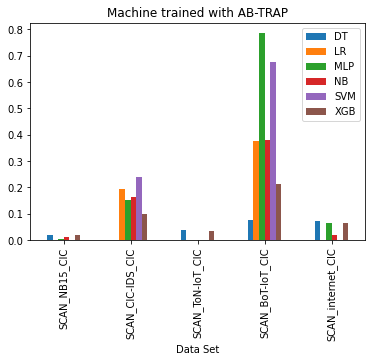

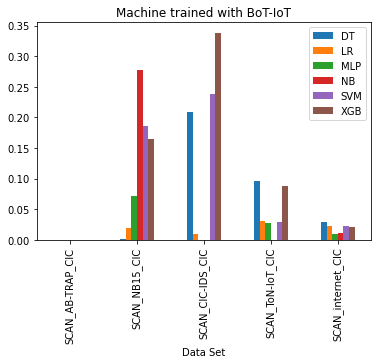

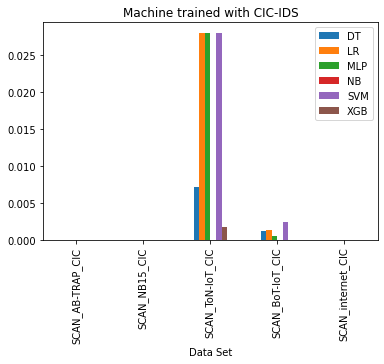

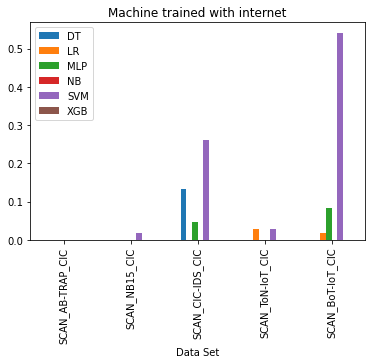

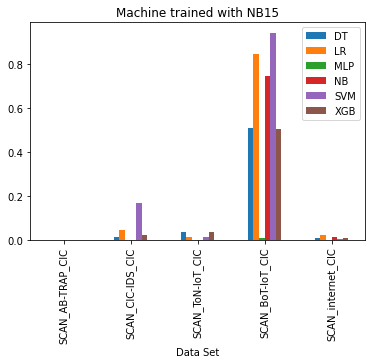

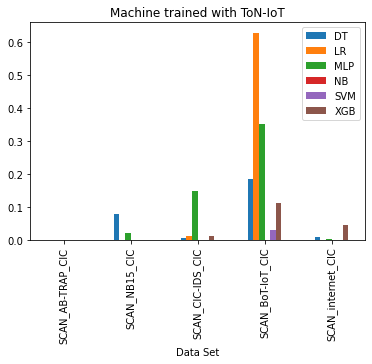

In [5]:
for o in data.origin.unique():
    data[data['origin']==o].plot(x="Data Set", kind="bar", stacked=False, title="Machine trained with {0}".format(o))
    plt.savefig("./ML-output/results_{0}.jpg".format(o), dpi=300, bbox_inches="tight")

# TRASH

In [8]:
machines = [x for x in data.columns if x not in ["Data Set", "origin"]]
temp = []
for ml in machines:
    temp.append(data[["Data Set", "origin", ml]].rename(columns={ml:"score"}) )
    temp[-1]["ML"] = ml
df = pd.concat(temp, ignore_index=True)

ML
DT     AxesSubplot(0.125,0.125;0.775x0.755)
LR     AxesSubplot(0.125,0.125;0.775x0.755)
MLP    AxesSubplot(0.125,0.125;0.775x0.755)
NB     AxesSubplot(0.125,0.125;0.775x0.755)
SVM    AxesSubplot(0.125,0.125;0.775x0.755)
XGB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

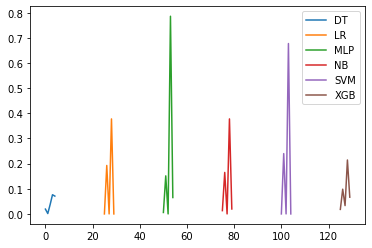

In [20]:
#df[df["origin"]=="AB-TRAP"]
df2 = df[df['origin']=="AB-TRAP"]
df2.plot(x="Data Set", kind="bar", stacked=False, title="teste")

### Get models and target DS. Only scan for now

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 3
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:27:14
setTarget: Removed 2800319 flows from other attack types



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


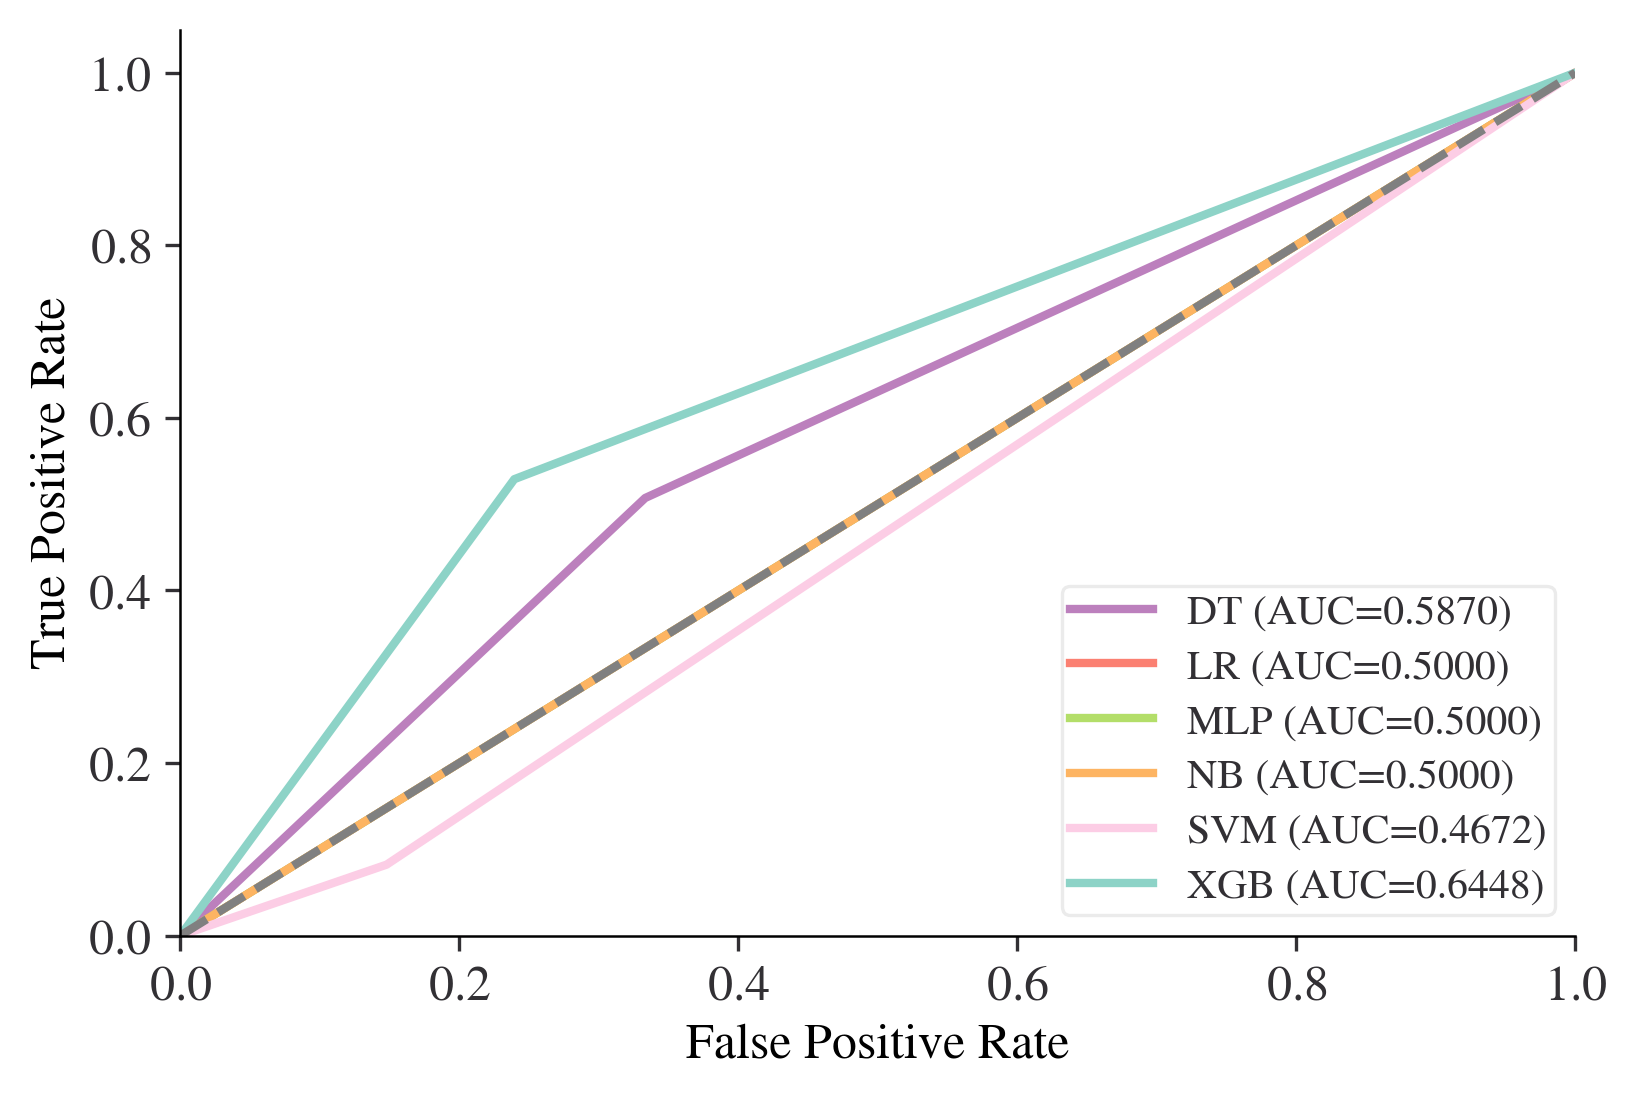

In [3]:
import os
from sklearn.metrics import roc_curve, auc
plt.style.use('supportFiles/plot_style.txt')

plt.figure()

index = 0
for model_key, model in models.items():
    fpr, tpr, thresholds = roc_curve( y, model.predict(prep.transform(X)) )
    AUC = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label="{} (AUC={:.4f})".format(model_key, AUC))
    index = index + 1
    # save ROC data
filename = 'dissertation/{0}_on_{1}_ROC.eps'.format(trainerDSName, testerDSName)
    #pd.DataFrame.from_dict(data={ 'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds }).to_csv(filename, index=False)
    
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig(filename, dpi=300, bbox_inches="tight")

# Feature Importance

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset, zeroVarRead
from joblib import dump, load

%matplotlib inline
getDSName(5)

'internet_CIC'

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT', 5: 'internet_CIC'}
trainerDS = 5
testerDS = 5
modelName = "DT"
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
#X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

featFile = open("./ML-output/features_{0}.txt".format(getDSName(trainerDS), "r"))
features = featFile.read()
featFile.close()
features = features.split(", ")

zeroVar = zeroVarRead(trainerDS)
features = [x for x in features if x not in zeroVar][:-1]
len(features)

loading models from SCAN_internet_CIC
Models fetched: ['SCAN_internet_CIC_DT.joblib', 'SCAN_internet_CIC_LR.joblib', 'SCAN_internet_CIC_MLP.joblib', 'SCAN_internet_CIC_NB.joblib', 'SCAN_internet_CIC_SVM.joblib', 'SCAN_internet_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
reading file: 


67

In [3]:
#models['SVM'].score(prep.transform(X),y)
#X.select_dtypes(exclude='string').columns[(X.var() == 0).values]
table

,model,avg_score,avg_fit_time
0,DT,0.883509,210.190669
1,LR,0.136619,1497.243566
2,MLP,0.757986,433.661956
3,NB,0.023855,350.863192
4,SVM,0.002603,3714.771654
5,XGB,0.867268,1816.504371


In [3]:
clf = models['DT'].best_estimator_
relevantes = clf.feature_importances_
for index in range(clf.n_features_in_):#.iterrows():
    print(relevantes[index], features[index])

0.14160484483073157 dst_port
0.0 protocol
0.0037287856471454133 flow_duration
0.010268488548296918 flow_byts_s
6.115645189147721e-05 flow_pkts_s
0.021388870705877246 fwd_pkts_s
9.573333483824678e-07 bwd_pkts_s
2.7490215175015443e-05 tot_fwd_pkts
5.654031116037464e-06 tot_bwd_pkts
0.0035794701646901916 totlen_fwd_pkts
3.404048829942104e-06 totlen_bwd_pkts
0.0 fwd_pkt_len_max
0.0 fwd_pkt_len_min
9.152319645708598e-05 fwd_pkt_len_mean
0.00014825432539707995 fwd_pkt_len_std
0.011894403957607267 bwd_pkt_len_max
1.1217885162339094e-05 bwd_pkt_len_min
4.4903859850373454e-08 bwd_pkt_len_mean
0.0 bwd_pkt_len_std
2.1318924479934715e-05 pkt_len_max
0.3957102320483331 pkt_len_min
0.03151176202970026 pkt_len_mean
0.0 pkt_len_std
0.0005699548923359725 pkt_len_var
0.00011912456136618628 fwd_header_len
1.8212828235839095e-05 bwd_header_len
0.0 fwd_seg_size_min
0.0 fwd_act_data_pkts
1.3371418607328755e-05 flow_iat_mean
1.2416784379028357e-05 flow_iat_max
5.70016906320967e-05 flow_iat_min
0.000236158604

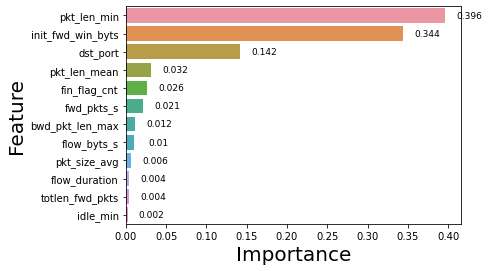

In [14]:
clf = models['DT'].best_estimator_

feature_importance = np.array(clf.feature_importances_)
feature_names = np.array(features)

data = {'feature_name': feature_names,
       'feature_importance': feature_importance}

fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.002]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    g.text(row.feature_importance+0.03, i, round(row.feature_importance, 3), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, modelName)
plt.savefig(filename, dpi=300, bbox_inches = "tight")

In [1]:
import pandas as pd
import numpy as np
import os
from supportFiles.myFunc import saveTable

files = [s for s in os.listdir("./dissertation/") if ((".csv" in s) and ("fscore_" in s))]
print(files)
for file in files:
    tableName = file.replace(".csv","")
    table = pd.read_csv("./dissertation/"+file, sep=',')
    caption = "Feature importance {0}".format(tableName)
    label = tableName
    saveTable(table, tableName, caption, label)

['fscore_AB-TRAP_CIC.csv', 'fscore_BoT-IoT_CIC.csv', 'fscore_NB15_CIC.csv', 'fscore_SCAN_AB-TRAP_CIC.csv', 'fscore_SCAN_BoT-IoT_CIC.csv', 'fscore_SCAN_CIC-IDS_CIC.csv', 'fscore_SCAN_NB15_CIC.csv', 'fscore_SCAN_ToN-IoT_CIC.csv', 'fscore_ToN-IoT_CIC.csv']
